In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

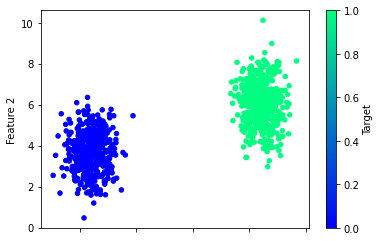

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 14.9736 - accuracy: 0.0018 
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 14.8330 - accuracy: 0.0019
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 14.6984 - accuracy: 0.0180
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 14.8279 - accuracy: 0.0062
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 14.5058 - accuracy: 0.0090
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 14.4109 - accuracy: 0.0135
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 14.5063 - accuracy: 0.0079
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 14.3000 - accuracy: 0.0090
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 14.0388 - accuracy: 0.0152
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 13.8376 - accuracy: 0.010

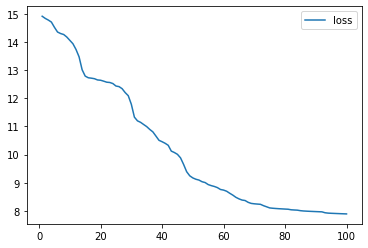

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

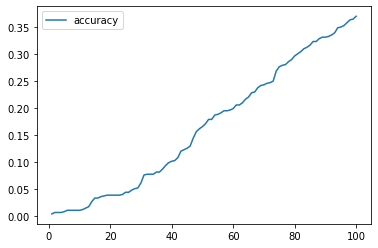

In [11]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 8.4039 - accuracy: 0.2840
Loss: 8.403929710388184, Accuracy: 0.2840000092983246


In [13]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

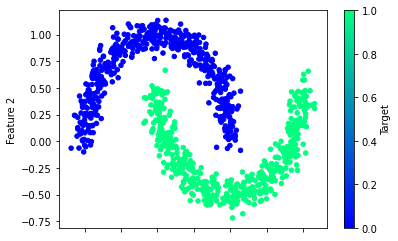

In [14]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [15]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [16]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 7.0239 - accuracy: 0.4880
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0118 - accuracy: 0.4880
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0067 - accuracy: 0.4867
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0054 - accuracy: 0.4867
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0041 - accuracy: 0.4867
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 7.0033 - accuracy: 0.4867
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 6.9919 - accuracy: 0.4853
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 6.9594 - accuracy: 0.4840
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 6.8913 - accuracy: 0.4827
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 6.7383 - accuracy: 0.4800
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 3.5405 - accuracy: 0.5320
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 3.5377 - accuracy: 0.5333
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 3.5352 - accuracy: 0.5333
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 3.5330 - accuracy: 0.5333
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 3.5308 - accuracy: 0.5347
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 3.5287 - accuracy: 0.5347
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 3.5042 - accuracy: 0.5373
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 3.4544 - accuracy: 0.5413
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 3.4467 - accuracy: 0.5427
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 3.4422 - accuracy: 0.5427
Epoch 93/100


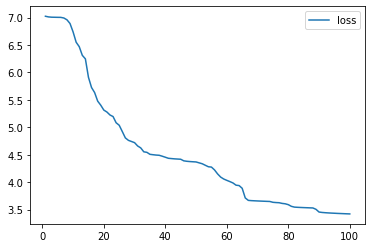

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

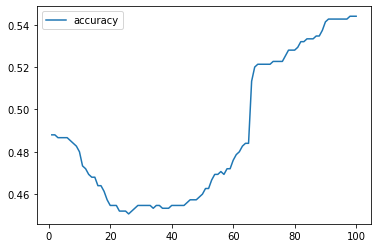

In [18]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 940us/step - loss: 0.6259 - accuracy: 0.4702
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.5344
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.6768
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.8058
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.8679
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8572
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8500
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8765
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8838
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8932
Epoch 1

## Checkpoint

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn' is not defined

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")